In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss

In [98]:
df=pd.read_excel(r"C:\Users\Dell\Downloads\New folder (2)\Womens Clothing Reviews Data.xlsx")
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [100]:

df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [101]:
df[df['Review Text'].isnull()]['Review Title'].value_counts()

Such a beautiful dress!    1
Name: Review Title, dtype: int64

In [102]:
dft = df.copy()

In [103]:
for col in ['Review Text', 'Category', 'Subcategory1', 'SubCategory2']:
    dft = dft[dft[col].notnull()]

In [104]:
df.isnull().sum()/len(df)*100

Product ID         0.000000
Category           0.059610
Subcategory1       0.059610
SubCategory2       0.059610
Location           0.000000
Channel            0.000000
Customer Age       0.000000
Review Title      16.222430
Review Text        3.597888
Rating             0.000000
Recommend Flag     0.000000
dtype: float64

In [105]:
len(dft)/len(df)

0.9634675977177893

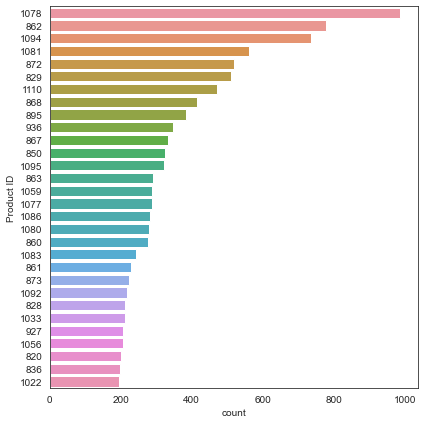

In [106]:
plt.figure(figsize=(6,6))
sns.countplot(y='Product ID', data= dft[dft["Product ID"].isin(dft["Product ID"].value_counts()[:30].index)],
             order = dft["Product ID"].value_counts()[:30].index);
plt.tight_layout()

In [107]:
dft[dft['Product ID'].isin([1078, 862, 1094, 1081])][["Review Title", "Category","Subcategory1","SubCategory2"]]\
.describe().T.drop('count', axis=1)

,unique,top,freq
Review Title,2171,Beautiful dress,24
Category,2,General,1708
Subcategory1,2,Dresses,2283
SubCategory2,2,Dresses,2283


In [108]:
def displot(data, title, num=1,bins=[30]):
    sns.set_style('whitegrid')
    f, ax = plt.subplots(1,num, figsize=(10,5))

    if num==1:
        
        sns.distplot(data, bins=bins[0])
    else:
        for i,d in enumerate(data):
            sns.distplot(d, bins=bins[i], ax=ax[i])
    plt.title(title)
    plt.ylabel('Density')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


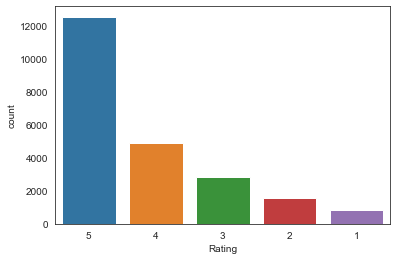

In [109]:
sns.countplot(dft['Rating'],order=range(5,0,-1));

In [110]:
def cplot(data, num=1, size=7):
    sns.set_style('whitegrid')
    f, ax = plt.subplots(1,num, figsize=(size*num,6))

    if num==1:
        
        sns.countplot(data, order=data.value_counts().sort_values(ascending=False).index, palette='viridis')
    else:
        for i,d in enumerate(data):
            sns.countplot(d, order=d.value_counts().sort_values(ascending=False).index, palette='viridis', ax=ax[i])
    plt.tight_layout()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


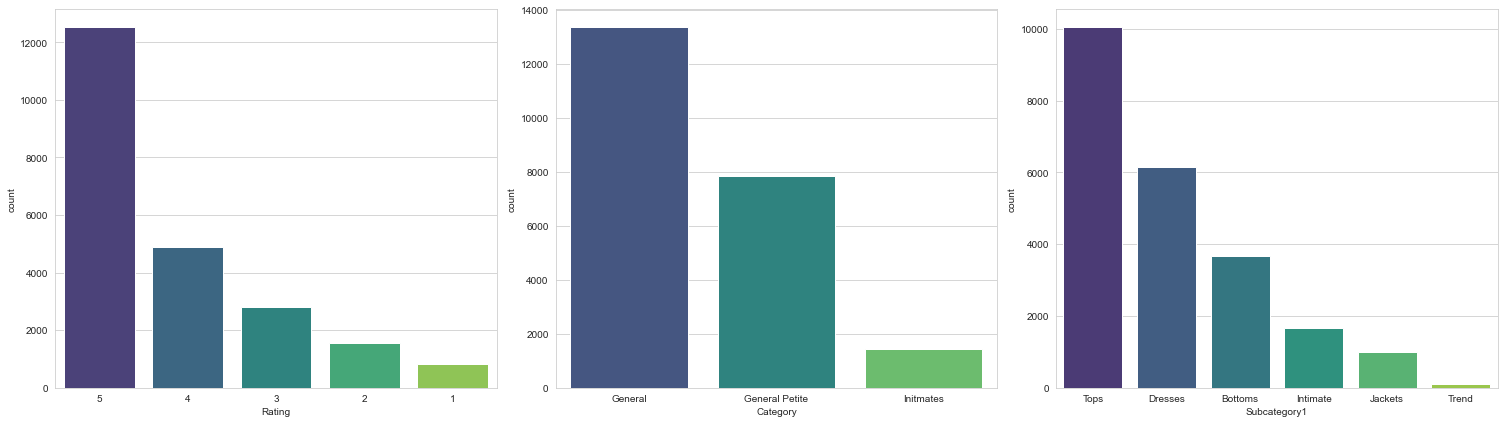

In [111]:
cplot([dft['Rating'], dft['Category'], dft['Subcategory1']], num=3)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


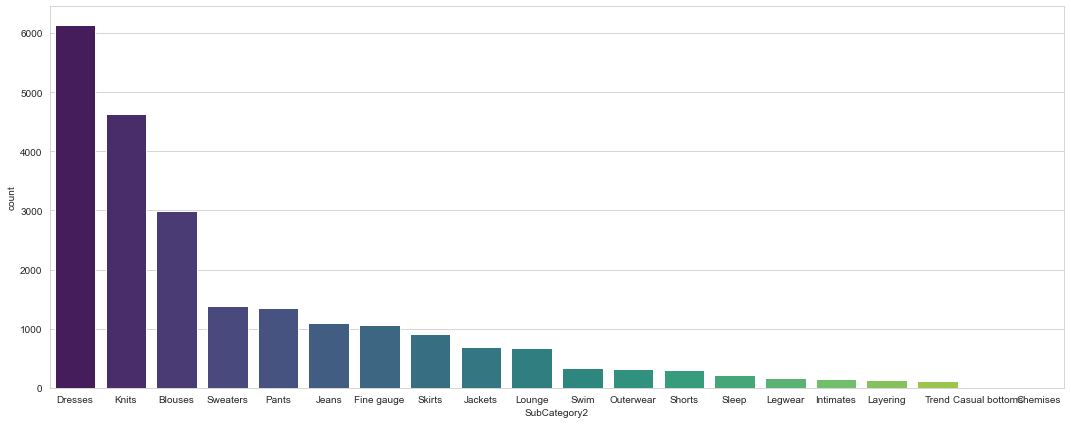

In [112]:
cplot(dft['SubCategory2'], size=15)

In [113]:
def highlight_max(s):
    '''
    highlight the maximum in a Series.
    '''
    is_max = s == s.max()
    return ['background-color: darkorange' if v else '' for v in is_max]
cm = pd.crosstab(dft['Category'], dft['Subcategory1'], normalize='index').mul(100).round(0)
cm.style.apply(highlight_max, axis=1)

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Category,,,,,,
General,18.000000,27.000000,0.000000,5.000000,49.000000,1.000000
General Petite,16.000000,32.000000,3.000000,5.000000,44.000000,0.000000
Initmates,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Correlation')

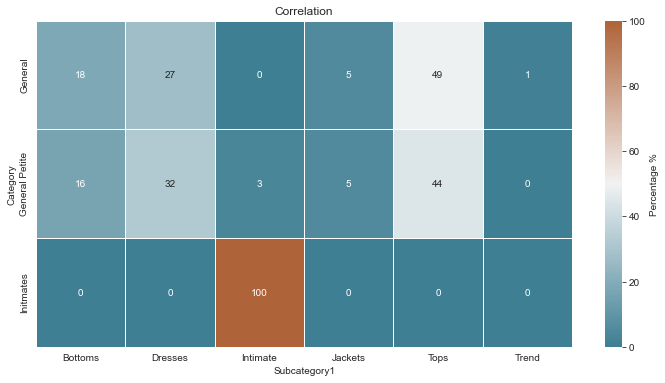

In [114]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Category'], dft['Subcategory1'],normalize='index').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

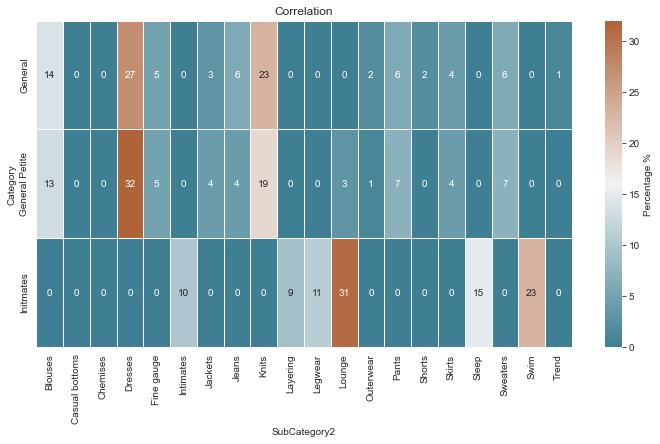

In [115]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Category'], dft['SubCategory2'],normalize='index').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

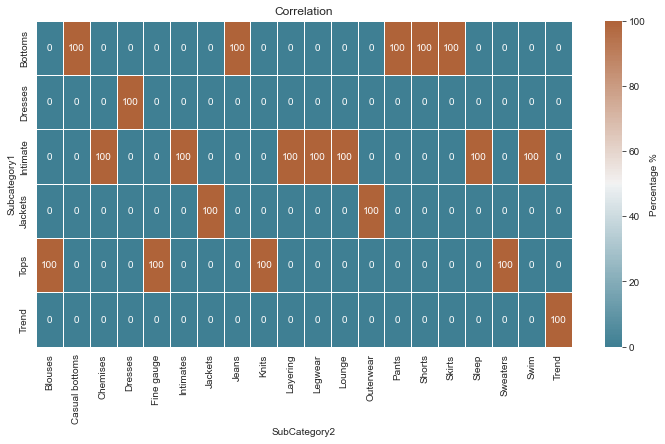

In [116]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Subcategory1'], dft['SubCategory2'],normalize='columns').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

In [117]:
dft[['Category', 'Subcategory1', 'SubCategory2']].apply(lambda x : pd.factorize(x)[0])+1

,Category,Subcategory1,SubCategory2
0,1,1,1
1,2,2,2
2,2,2,2
3,3,3,3
4,2,4,4
...,...,...,...
23481,3,2,2
23482,3,4,5
23483,3,2,2
23484,2,2,2


In [118]:
from scipy.stats import chisquare

In [119]:
dd = dft[['Category', 'Subcategory1', 'SubCategory2']].apply(lambda x : pd.factorize(x)[0])+1

In [120]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2, p, dof, _  = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return (np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))), p, dof)

In [121]:
cat_col = ['Category', 'Subcategory1', 'SubCategory2']

In [122]:
V = []
for cat1 in cat_col:
    for cat2 in cat_col:
        ct = pd.crosstab(dft[cat1], dft[cat2], normalize='index').mul(100).round(0)
        if cat1 == 'SubCategory2' or (cat2== 'SubCategory2'):
            v, _, _ = cramers_v(ct.values+0.1) ## since empty rows and columns result in error (division by 0)
        else:
            v, _, _ = cramers_v(ct.values)
        V.append(v)

In [123]:
cat_df = pd.DataFrame(data =np.array(V).reshape(3,3), index=cat_col, columns=cat_col)

In [124]:
cat_df.style.apply(highlight_max, axis=1)

,Category,Subcategory1,SubCategory2
Category,1.000000,0.685066,0.642323
Subcategory1,0.654187,1.000000,0.969538
SubCategory2,0.719389,0.987969,0.980206


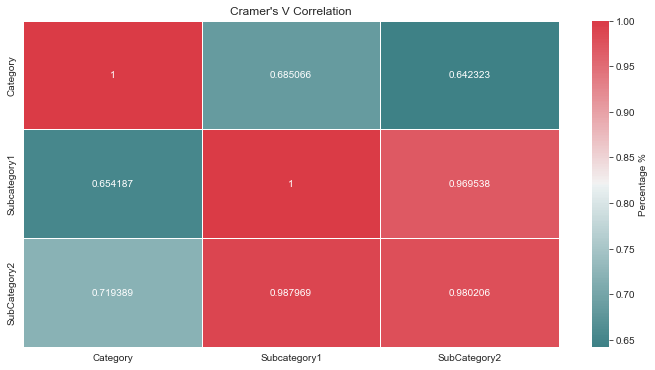

In [125]:
plt.subplots(figsize=(12,6))
sns.heatmap(cat_df,\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(200, 10, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title("Cramer's V Correlation");

In [126]:
num_col = dft.select_dtypes(include=['int64']).columns
num_col

Index(['Product ID', 'Customer Age', 'Rating', 'Recommend Flag'], dtype='object')

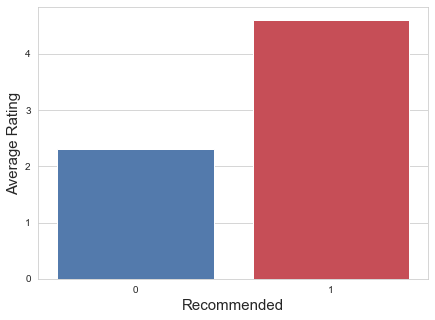

In [127]:
f, ax = plt.subplots(figsize=(7,5))
b = sns.barplot(y = 'Rating',x= [0,1], \
            data =dft[['Rating', 'Recommend Flag']].groupby('Recommend Flag').mean(),\
           palette=sns.diverging_palette(250, 10, n=2));
b.set_xlabel('Recommended', size=15)
b.set_ylabel('Average Rating', size=15);

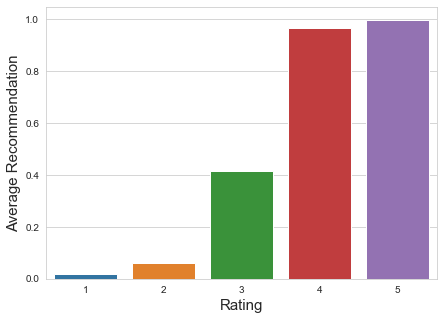

In [128]:
f, ax = plt.subplots(figsize=(7,5))
b = sns.barplot(y = 'Recommend Flag',x= [1,2,3,4,5], \
            data =dft[['Rating', 'Recommend Flag']].groupby('Rating').mean(),\
           );
b.set_xlabel('Rating', size=15)
b.set_ylabel('Average Recommendation', size=15);

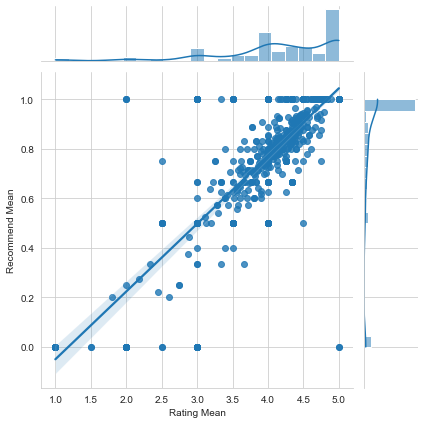

In [129]:
temp = (dft.groupby('Product ID')[["Rating","Recommend Flag", "Customer Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommend Flag Count",
                 "Recommend Mean","Customer Age Count","Customer Age Mean"]
temp.drop(["Recommend Flag Count","Customer Age Count"], axis=1, inplace =True)
sns.jointplot(x='Rating Mean', y='Recommend Mean', data=temp, kind='reg')

In [130]:
ss.pearsonr(temp['Rating Mean'], temp['Recommend Mean'])

(0.7961478196812519, 1.6074854843209124e-257)

In [131]:
dft.dtypes

Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
dtype: object

In [132]:
temp[(temp['Rating Mean'] ==5 )& (temp['Recommend Mean'] == 0)]

,Count,Rating Mean,Recommend Mean,Customer Age Mean
Product ID,,,,
53,1,5.0,0.0,29.0
776,1,5.0,0.0,56.0


In [133]:
dft[dft['Product ID'].isin([776,53])]

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
12032,776,Initmates,Intimate,Legwear,Gurgaon,Web,56,Really comfy socks,"Yes,you need these, so comfortable - and wash up perfectly - workout, walking or great to sleep in",5,0
17968,53,General,Bottoms,Shorts,Gurgaon,Web,29,NaN,"Very cute shorts. sadly, after one wash they became a lint magnet so had to be returned. disappointing quality.",5,0


In [134]:
temp.rename(mapper={'Rating Mean':'Rating_Mean', 'Recommend Mean': 'Recommended_Mean', 'Customer Age Mean': 'Age_Mean'}, 
             axis=1,inplace=True)
temp

,Count,Rating_Mean,Recommended_Mean,Age_Mean
Product ID,,,,
1,3,4.000000,0.666667,36.666667
2,1,4.000000,1.000000,28.000000
3,1,5.000000,1.000000,36.000000
4,1,5.000000,1.000000,28.000000
5,1,5.000000,1.000000,39.000000
...,...,...,...,...
1200,1,3.000000,0.000000,24.000000
1202,9,4.333333,1.000000,42.000000
1203,7,4.428571,0.714286,39.142857


In [135]:
from statsmodels.formula.api import ols

In [136]:
results = ols('Recommended_Mean ~ Rating_Mean', data=temp).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Recommended_Mean   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2025.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.61e-257
Time:                        19:11:45   Log-Likelihood:                 364.09
No. Observations:                1172   AIC:                            -724.2
Df Residuals:                    1170   BIC:                            -714.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3235      0.026    -12.464      0.000      -0.374      -0.273
Rating_Mean     0.2736      0.006     45.005      0.000       0.262       0.286
==============================================================================
Omnibus:                      154.960   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.244
Skew:                          -0.401   Prob(JB):                    2.86e-222
Kurtosis:                       7.500   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Rating_Mean'>

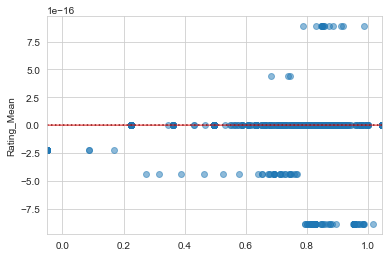

In [137]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_abs_resid = np.abs(model_residuals)

sns.residplot(model_fitted_y, temp['Rating_Mean'], data=temp, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

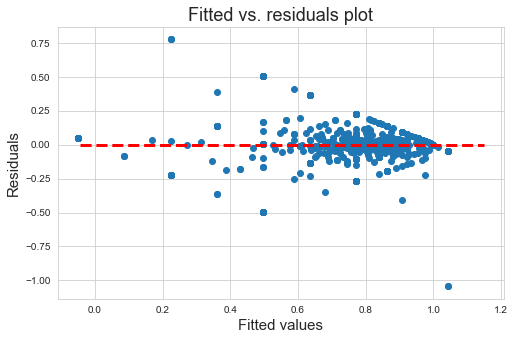

In [138]:
plt.figure(figsize=(8,5))
p = plt.scatter(x=model_fitted_y, y=model_residuals)
xmin=min(model_fitted_y)
xmax = max(model_fitted_y)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [139]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True).fit(np.array(temp['Rating_Mean']).reshape(-1,1), temp['Recommended_Mean'])

In [140]:
print(LR.coef_)
print(results.params)

[0.27358224]
Intercept     -0.323460
Rating_Mean    0.273582
dtype: float64


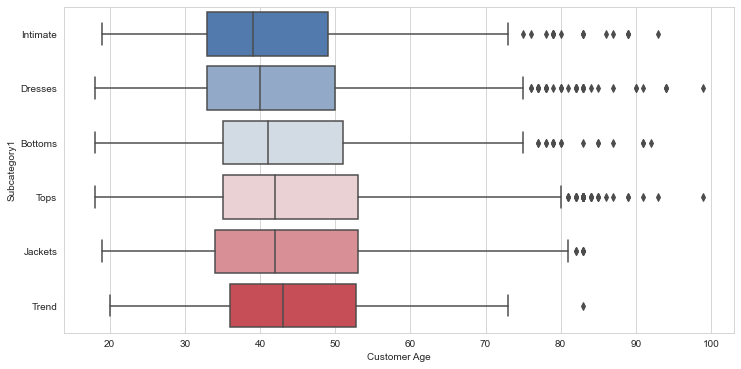

In [141]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['Subcategory1'], palette=sns.diverging_palette(250, 10, n=6));

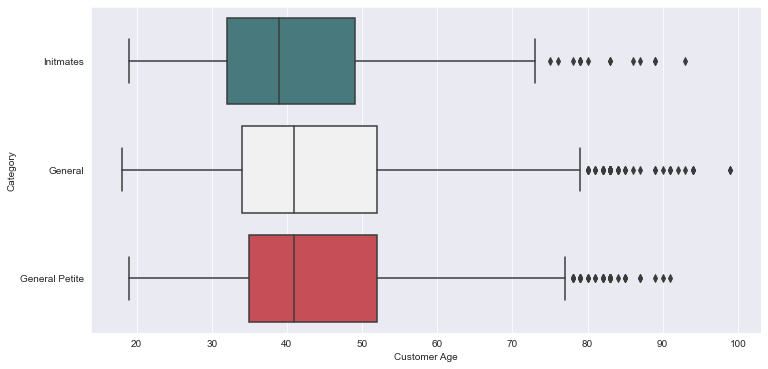

In [142]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['Category'], palette=sns.diverging_palette(200, 10, n=3));

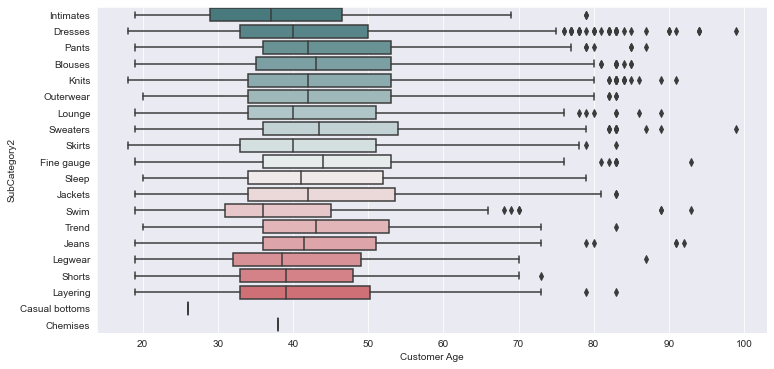

In [143]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['SubCategory2'],palette=sns.diverging_palette(200, 10, n=20));


In [144]:
dff = dft[['Customer Age', 'Category']]
dff1 = dff[dff['Category'] == 'Initmates']['Customer Age']
dff2 = dff[dff['Category'] == 'General']['Customer Age']
dff3 = dff[dff['Category'] == 'General Petite']['Customer Age']

In [145]:
dff.groupby('Category').mean()

,Customer Age
Category,
General,43.426712
General Petite,43.400153
Initmates,41.290323


In [146]:
dff1

0        33
13       44
25       31
28       53
34       39
         ..
23249    34
23318    39
23425    23
23438    68
23476    27
Name: Customer Age, Length: 1426, dtype: int64

In [147]:
ss.f_oneway(dff1, dff2, dff3)

F_onewayResult(statistic=19.923191829766157, pvalue=2.2650514208092683e-09)

In [148]:
dff = dff.rename(columns={"Customer Age": "Customer_Age"})

In [149]:
results = ols('Customer_Age ~ C(Category)', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Customer_Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.92
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           2.27e-09
Time:                        19:11:58   Log-Likelihood:                -88926.
No. Observations:               22628   AIC:                         1.779e+05
Df Residuals:                   22625   BIC:                         1.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        43.4267      0.107    407.573      0.000      43.218      43.636
C(Category)[T.General Petite]    -0.0266      0.175     -0.152      0.880      -0.370       0.317
C(Category)[T.Initmates]         -2.1364      0.343     -6.226      0.000      -2.809      -1.464
==============================================================================
Omnibus:                      916.673   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1027.304
Skew:                           0.519   Prob(JB):                    8.39e-224
Kurtosis:                       2.881   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Category),6.045897e+03,2.0,19.923192,2.265051e-09
Residual,3.432894e+06,22625.0,NaN,NaN


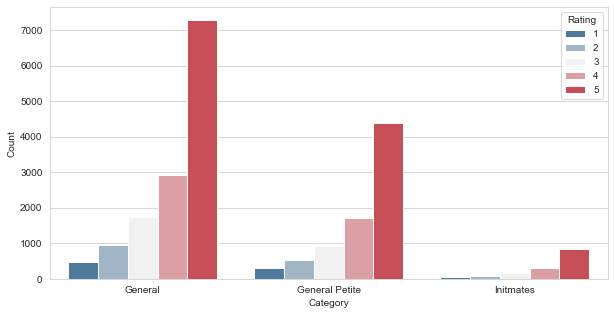

In [151]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,5))
a = dft[['Category', 'Rating']]\
.groupby(['Category'])['Rating']\
.value_counts()\
.rename('Count')\
.reset_index()\
.sort_values('Rating')
sns.barplot(x='Category', y = 'Count', hue='Rating', data=a, palette=sns.diverging_palette(240, 10, n=5, center="light"));

In [152]:
def percentagebarplot(x, y, hue, data, ax=None, n=5):
    sns.barplot(x =x, y =y, hue=hue,\
                data = data[[x, hue]]\
                .reset_index(drop=True)\
                .groupby([x])[hue]\
                .value_counts(normalize=True)\
                .rename('Percentage').mul(100)\
                .reset_index()\
                .sort_values(hue),\
                palette=sns.diverging_palette(240, 10, n=n, center="light"),\
               ax =ax)

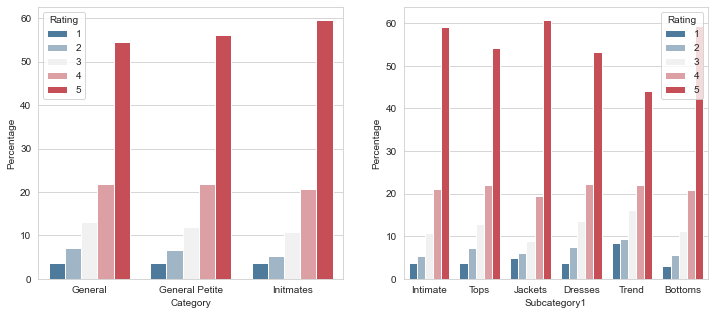

In [153]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Category', y ='Percentage', hue='Rating',  data=dft, ax=ax[0], n=5)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Rating',  data=dft, ax=ax[1], n=5)
plt.show()

In [154]:
a

,Category,Rating,Count
4,General,1,479
9,General Petite,1,291
14,Initmates,1,51
3,General,2,950
8,General Petite,2,524
13,Initmates,2,75
2,General,3,1740
7,General Petite,3,929
12,Initmates,3,154
1,General,4,2910


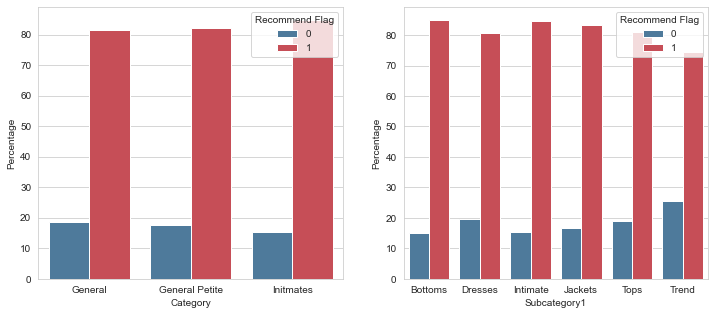

In [155]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Category', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[0], n=2)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[1], n=2)
plt.show()

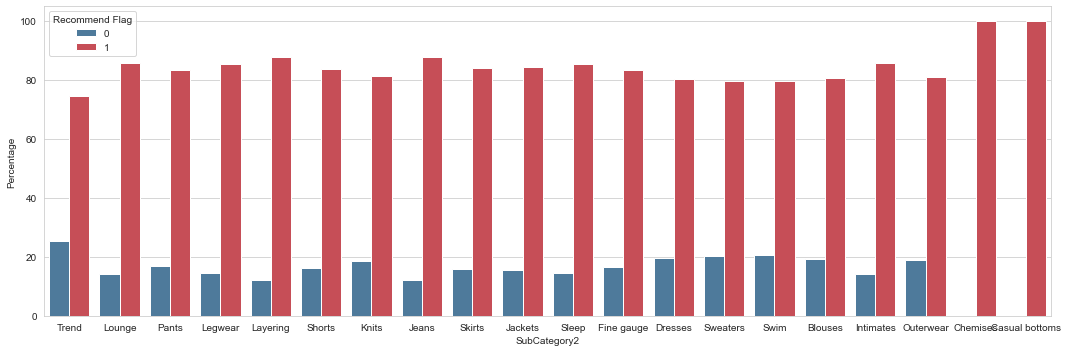

In [156]:
f, ax = plt.subplots(figsize=(15,5))

percentagebarplot(x='SubCategory2', y ='Percentage', hue='Recommend Flag',  data=dft, n=2)
#percentagebarplot(x='Department Name', y ='Percentage', hue='Recommended IND',  data=dft, ax=ax[1], n=2)
plt.tight_layout()
plt.show()

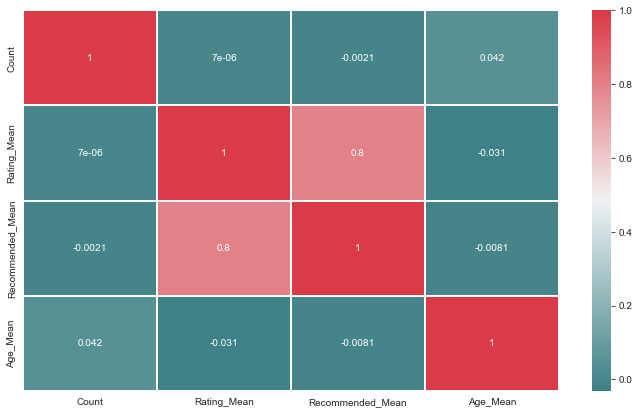

In [157]:
f, ax = plt.subplots(figsize=(12,7))

sns.heatmap(temp.corr(),annot=True, cmap=sns.diverging_palette(200, 10, n=100), linecolor='white',lw=0.1);

In [158]:
pd.set_option('max_colwidth', 500)
dft[['Review Title','Review Text', 'Rating']].sample(20)

,Review Title,Review Text,Rating
6643,Not as pictured,"The jeans look so different online! the pair i got did not have the stone washed look and was completely different cut. the rise is not as stated and is actually 10.5 inches! also, i'm a true 25 and the waist is like a 27, but the legs are super skinny. i'm so disappointed and i'm not even sure if is worth swapping out for a smaller size. these look more like men's cut jeans.",1
19221,Nice to look at,Top opens in the middle right in front. should have some sort of closure inside to prevent this top from flying open will return,1
1249,European flair,"I love this dress!! it has a beautiful european flair, and more beautiful in person. i don't agree with the other reviewers that its see through-the fabric is a good quality, and thicker than you would think. the variable length is the best part of the dress. the color looks beautiful with a tan summer glow!",5
19890,"Pretty, colorful top",Saw this top online and hoped for the best. my hopes were rewarded! lovely lightweight summery top but i think with a cardigan it could be worn in the fall also. i asked 4 friends if they liked it and they all agreed it was very flattering so i decided it was a keeper. have worn it three times since purchasing and have received lots of compliments.,5
17619,Not for all body types,"I tried this on at the store in black. the lace on the back is gorgeous and the fabric is very soft, but i would disagree with the previous reviews - i don't think this is flattering on all body types. i've got an hourglass figure and the top absolutely robs you of a waist. it drapes straight down on the front, so if you have a larger chest, you end up looking like a football player.\n\ni think for a narrow frame or a smaller chest, this would be very flattering.",3
4962,My favorite piece this season,"This sweater is lovely! i have worn it every other day since i got it. it is soft and warm and elevates everything that you wear it with. i have gotten compliments every time i've worn it. my daughter, who rarely likes the style of clothes i wear, said i looked like a winter princess in this! it is so flattering and comfortable---a winning combination!",5
16291,An o.k. tunic,"Not for petite women, you need to have a long figure for this tunic to drape like it does on the model. if it ever goes on sale i will purchase it but not worth the full price for me at the moment.",3
1979,Great top!,I typically wear an xs to s in tops and purchased an xs for a less flowy fit. this top has a luxurious feel and the green color is really beautiful (more matte than shiny). perfect piece to wear under a jacket or blazer.,5
2803,So tent-like and unflattering!,"Looks great on the model, but in actuality there is way too much fabric; what should be flowy and billowy looks like a tent (or a maternity top on a petite woman). it didn't matter which size, they all fit me disastrously. i love the look and i thought of keeping it and having it taken in, but there's too much fabric under the chest to make it an easy cut/alteration on the side seams. sometimes i wonder who comes up with these patterns, and if they pin the shirts back on the models. if you p...",1
764,Great for hot summers,"I am on the fence about this dress, as you'll see the reasons below, but it is really breathable fabric and extremely comfortable!_x000D_\n__________x000D_\npros:_x000D_\n- tons of stretch to the top part. i'm a 36c, so a lot of retailer tops are too snug for women with some bust. however, i fit into a medium here without it being too snug. you could actually go down or up depending on how loose or tight you'd like it to be on you._x000D_\n- the bottom half, the skirt, feels so nice on the s...",4


In [159]:
def cleanText(text):
    
    #Remove non-alpha characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '',text)
    #Remove multiple spaces, replace by single space
    text = re.sub(r'  +', ' ', text)
    #Lower case all 
    text = text.lower()
    
    return text

In [160]:
import re 

In [161]:
t = "Awesome             shirt...great'"''" transition £!*$*(Q&@Q@_&^%$£~#!) into fall.\n somewhat sheer. extremely comfortable!"
re.sub(r'[^a-zA-Z0-9 ]+', '',t)

'Awesome             shirtgreat transition QQ into fall somewhat sheer extremely comfortable'

In [162]:
dft['Clean Text'] = dft['Review Text'].apply(lambda x: cleanText(x))

Text(0.5, 1.0, 'Comparision of Processed vs Unprocessed Text w.r.t text length metrics')

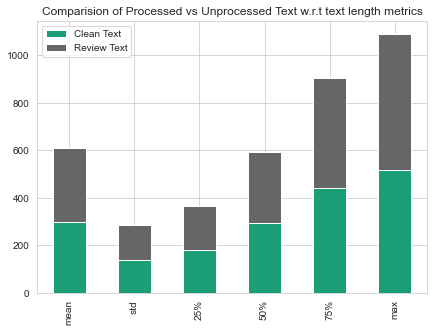

In [163]:
f, ax = plt.subplots(figsize=(7,5))
a = dft['Clean Text'].apply(lambda x: len(x)).describe().drop(['count','min'])
b = dft['Review Text'].apply(lambda x: len(x)).describe().drop(['count','min'])
temp = pd.DataFrame({'Clean Text':a, 'Review Text':b})
temp.plot.bar(stacked=True, colormap='Dark2', ax=ax);
ax.set_title("Comparision of Processed vs Unprocessed Text w.r.t text length metrics")

In [164]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tokens = []
for row in dft['Clean Text']:
    for tk in row.split():
        if tk not in stop_words and (tk != ''):
            tokens.append(tk)

In [165]:
len(tokens)

668027

In [166]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tag import pos_tag

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [167]:
dft['Clean Tokens'] = dft['Clean Text']\
.apply(lambda x: [w for w in nltk.tokenize.word_tokenize(x) if w not in stop_words and (w != '')])

In [168]:
dft['Clean Tokens'].apply(lambda x: len(x)).sum()

667862

In [169]:
aa = [w for z in dft['Clean Tokens'] for w in z]
aaa = set(aa)
bbb = set(tokens)
len(set(aa)) - len(set(tokens))
asda = [w for w in bbb if w not in aaa]

In [170]:
a12 = " ".join(['gonna', 'gotta', 'wanna', 'cannot'])
nltk.tokenize.word_tokenize(a12)

['gon', 'na', 'got', 'ta', 'wan', 'na', 'can', 'not']

In [171]:
pos_tag(['being'])

[('being', 'VBG')]

In [172]:
def Lemma(tokens):
    lemma = WordNetLemmatizer()
    lemma_sent = []
    
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos= 'n'
        elif tag.startswith('VB'):
            pos= 'v'
        else:
            pos = 'a'
        lemma_sent.append(lemma.lemmatize(word, pos))
    
    return lemma_sent

In [173]:
tokens_ = Lemma(tokens)

In [174]:
freq = nltk.FreqDist(tokens_)
items = sorted(freq.items(), key= lambda kv: kv[1], reverse= True)

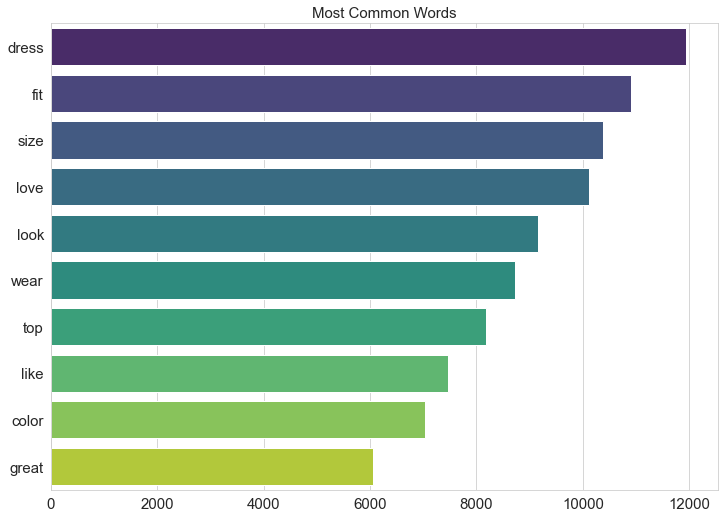

In [175]:
k,v = zip(*items)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')

sns.barplot(x=list(v[:10]), y=list(k[:10]), palette ='viridis')
plt.tight_layout()
plt.title('Most Common Words', size=15)
plt.tick_params(labelsize=15)

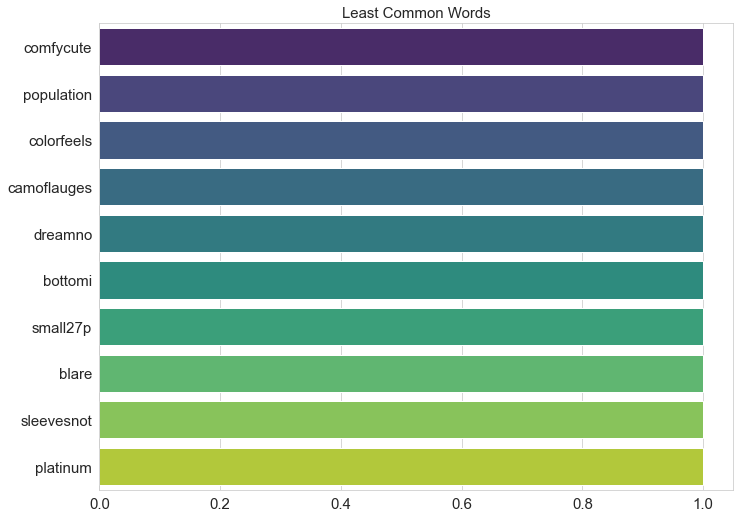

In [176]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')

sns.barplot(x=list(v[-10:]), y=list(k[-10:]), palette ='viridis')
plt.tight_layout()
plt.title('Least Common Words', size=15)
plt.tick_params(labelsize=15)
plt.show()

In [177]:
Subcategory1_Name = list(dft['Subcategory1'].unique())
token_labels = []
for i, dep in enumerate(Subcategory1_Name):
    token_labels.append([])
    for row in dft[dft['Subcategory1'] == dep]['Clean Text']:
        for tk in row.split():
            if tk not in stop_words and (tk != ''):
                token_labels[i].append(tk)

# Lemmatize tokens
token_labels_lem = []
for i in range(len(Subcategory1_Name)):
    token_labels_lem.append(Lemma(token_labels[i]))

In [178]:
freq_label = []
item_label = []
for i in range(len(Department_Name)):
    
    freq_label.append(nltk.FreqDist(token_labels_lem[i]))
    item_label.append(sorted(freq_label[i].items(), key= lambda kv: kv[1], reverse = True))

NameError: name 'Department_Name' is not defined

In [ ]:
fig, axs = plt.subplots(6, figsize=(10,15))

for i in range(len(Department_Name)):
    
    k1,v1= zip(*item_label[i])
    sns.barplot(y =list(k1[:10]),x= list(v1[:10]), palette='viridis',ax=axs[i])
    plt.tight_layout()
    axs[i].set_title('Common Words for Label: {}'.format(Department_Name[i]), size=15)

In [ ]:
from wordcloud import WordCloud

def wordcloud(freqd,c):
    if c%2 == 0:
        color = 'Black'
    else:
        color = 'white'
    wc = WordCloud(width=1200, height=800,
                  background_color=color,
                  max_words=200)
    wc = wc.generate_from_frequencies(freqd)
    return wc
    fig=plt.figure(figsize=(6,4))
        
fig = plt.figure(figsize=(12,12))

wc1 = [None] *6
for i in range(len(Subcategory1_Name)):
    axs = fig.add_subplot(3,2,i+1)
    wc1[i] = wordcloud(dict(item_label[i]),i)
    axs.imshow(wc1[i], interpolation='bilinear')
    axs.axis('off')
    axs.set_title("Subcategory1 : {}".format(Subcategory1_Name[i]), size=15)

plt.tight_layout()
plt.show()

In [ ]:
dft[dft['Subcategory1'] == "Intimate"]['Clean Text']

In [ ]:
dft.dtypes

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import string

In [ ]:
SIA = SentimentIntensityAnalyzer()

In [ ]:
pd.set_option('max_colwidth', 50)
dft.head()

In [ ]:
dft['Sentiment'].unique()

In [ ]:
fig, axs = plt.subplots(figsize=(6,5))

sns.barplot(x=dft['Sentiment'].unique(),
            y=dft['Sentiment'].value_counts(normalize=True).mul(100),
            data=dft,
            );
axs.set_xlabel('Sentiment', size=12)
axs.set_ylabel('Percentage', size=12)
axs.set_title('Sentiment Distribution');

In [ ]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Sentiment', y ='Percentage', hue='Rating',  data=dft, ax=ax[0], n=5)
percentagebarplot(x='Sentiment', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[1], n=2)
plt.show()

In [ ]:
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.set_style('white')
percentagebarplot(x='Category', y ='Percentage', hue='Sentiment',  data=dft, ax=ax[0], n=3)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Sentiment',  data=dft, ax=ax[1], n=3)
plt.show()

In [ ]:
featLab = list(zip(dft['Clean Tokens'], dft['Recommend Flag']))

word_features = list(dict(items).keys())[:2000]

def find_features(doc):
    
    ## For each review, create a feature dictionary recording which features are present and not. 
    ## for example first review has these features ['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']
    ## only these will be True reset all False. 
    
    words = set(doc)
    features = {}
    for w in word_features:
         features[w] = (w in words)
    return features

featureset = [(find_features(txt), label ) for  (txt, label) in featLab]

In [ ]:
train_set = featureset[:15000]
test_set = featureset[15000:]

In [ ]:

clf = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(clf, test_set))*100)
print(clf.show_most_informative_features(40))